# Imports


In [7]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
from scripts.gaussian.streaming_clusterer import CluStream
from scripts.gaussian.dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [9]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [10]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

# file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [11]:
def init_dynamic_clusterer(data=reference_data, threshold=2.5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data, clustream_model, drift_detector, colors, ax_limit=10
    )

    return dynamic_clusterer

New model created - id: 27432
(id: 0)
(id: 1)
<!> Change detected! Possible input drift at timestamp 6 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.414893201879553), np.float64(4.950238859331286), np.float64(7.963313143532555), np.float64(7.962898260838276), np.float64(2.603630939045468), np.float64(0.7519091730182236), np.float64(4.222723598952766), np.float64(1.9599804454021625), np.float64(5.092146845551224), np.float64(5.246356253151421), np.float64(3.960034544403489), np.float64(6.904427339364816), np.float64(7.2095593826190845), np.float64(6.229426684680286), np.float64(7.252913571692802), np.float64(4.806347846984863)]
prod0 - center: [np.float64(5.428390438492234), np.float64(4.95327557099832), np.float64(7.9608920178971845), np.float64(7.959244734532124), np.float64(2.6014187915905103), np.float64(0.7488193673056525), np.float64(4.215493935722488), np.float64(1.961302225117211), np.float64(5.091472896369728), np.float64(5.248510889104895), np.float64(3.9558623

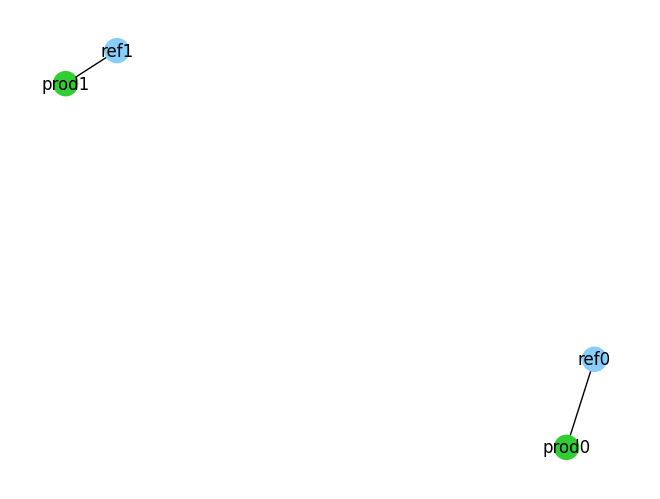

(id: 0) SURVIVED as (id: 0) (score: 0.9948795615388525)
(id: 1) SURVIVED as (id: 1) (score: 0.9865879360936853)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 36 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.428390438492234), np.float64(4.95327557099832), np.float64(7.9608920178971845), np.float64(7.959244734532124), np.float64(2.6014187915905103), np.float64(0.7488193673056525), np.float64(4.215493935722488), np.float64(1.961302225117211), np.float64(5.091472896369728), np.float64(5.248510889104895), np.float64(3.9558623234430947), np.float64(6.902486057968827), np.float64(7.20570800755475), np.float64(6.232347378859648), np.float64(7.251789224040401), np.float64(4.8092903768694075)]
prod0 - center: [np.float64(5.538916989376671), np.float64(5.0026112669392635), np.float64(7.953056550862496), np.float64(7.940904847362585), np.float64(2.611

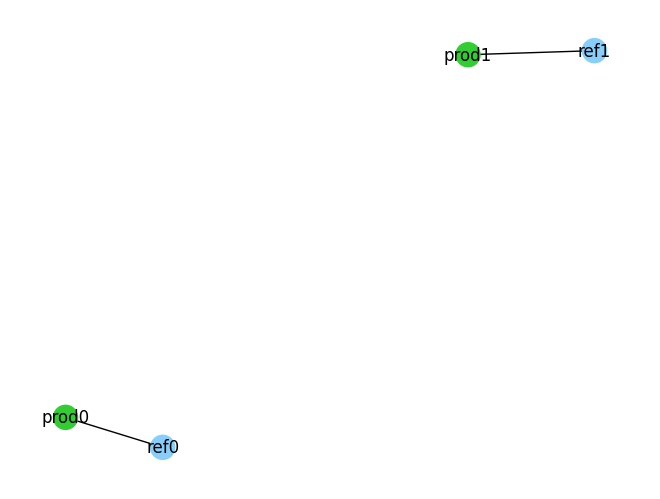

(id: 0) SURVIVED as (id: 0) (score: 0.9600804122493811)
(id: 1) SURVIVED as (id: 1) (score: 0.9680903437758036)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 183 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.538916989376671), np.float64(5.0026112669392635), np.float64(7.953056550862496), np.float64(7.940904847362585), np.float64(2.611838384678489), np.float64(0.7589479260015906), np.float64(4.196004913564314), np.float64(1.9887362844065617), np.float64(5.101326354762964), np.float64(5.273479352917588), np.float64(3.9420352421308817), np.float64(6.854469362058137), np.float64(7.1849969709128665), np.float64(6.245458851780808), np.float64(7.198982801353722), np.float64(4.822660249576234)]
prod0 - center: [np.float64(5.647877970257321), np.float64(5.002345665081127), np.float64(7.9393617806133925), np.float64(7.9014232803035425), np.float64(2

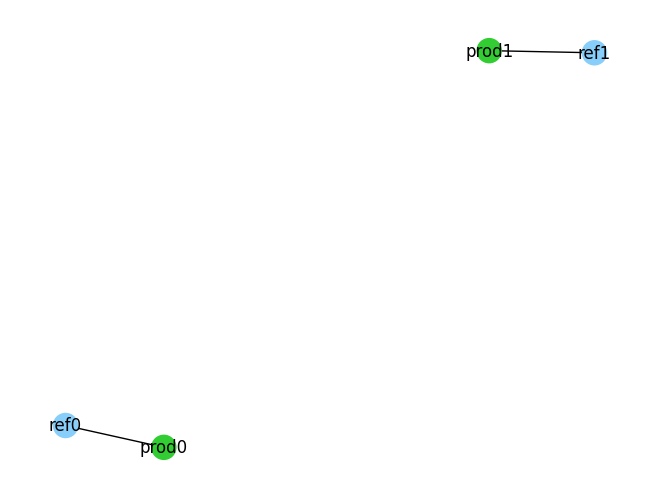

(id: 0) SURVIVED as (id: 0) (score: 0.9555626687665405)
(id: 1) SURVIVED as (id: 1) (score: 0.8515112795828254)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 213 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.647877970257321), np.float64(5.002345665081127), np.float64(7.9393617806133925), np.float64(7.9014232803035425), np.float64(2.5799257164602882), np.float64(0.7569471162718695), np.float64(4.114773879180083), np.float64(2.005158579564309), np.float64(5.086020751042409), np.float64(5.298108322126371), np.float64(3.915474238696399), np.float64(6.8407768451415745), np.float64(7.156350253938554), np.float64(6.283741186330984), np.float64(7.194038292309186), np.float64(4.857556055257986)]
prod0 - center: [np.float64(5.7686827745077744), np.float64(5.067527330146645), np.float64(7.956810071783246), np.float64(7.887865080023712), np.float64(2.

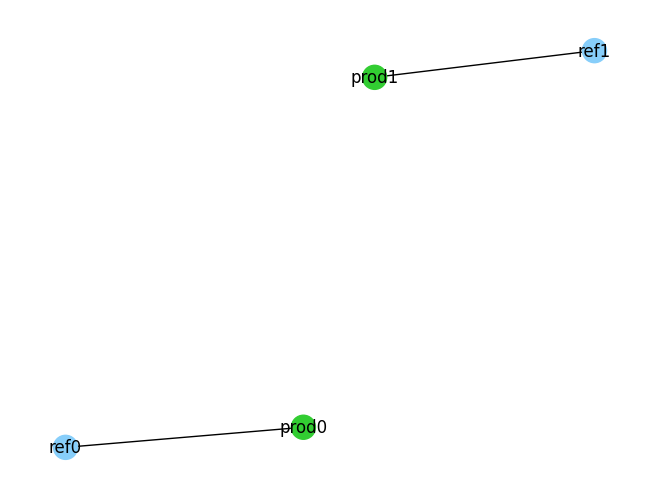

(id: 0) SURVIVED as (id: 0) (score: 0.9562092982369151)
(id: 1) SURVIVED as (id: 1) (score: 0.9559033830111477)

Final macroclusters:
(id: 0)
(id: 1)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 243 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.7686827745077744), np.float64(5.067527330146645), np.float64(7.956810071783246), np.float64(7.887865080023712), np.float64(2.580456793308258), np.float64(0.7560835649382394), np.float64(4.13008585516012), np.float64(2.0443647458868206), np.float64(5.079764624811569), np.float64(5.320279139392781), np.float64(3.9197633682556874), np.float64(6.844477984140504), np.float64(7.13598781261804), np.float64(6.277578572057328), np.float64(7.137127264490667), np.float64(4.858932994446665)]
prod0 - center: [np.float64(8.418264089820143), np.float64(6.797881828115848), np.float64(8.719350189276122), np.float64(7.577480156659828), np.float64(2.4417

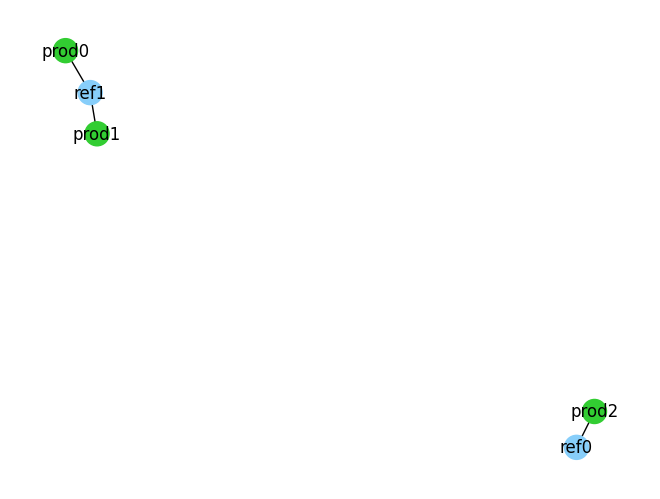

(id: 1) SURVIVED as (id: 1) (score: 0.5052760924487966)
(!) (id: 1) SURVIVED as (id: 2) but a SPLITTING is needed (score: 0.832922488950642)
(id: 0) SURVIVED as (id: 0) (score: 0.9495368907030006)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 321 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.624864588830637), np.float64(5.005393044148633), np.float64(7.932327085070249), np.float64(7.904938896499289), np.float64(2.5874215377709526), np.float64(0.751760221024582), np.float64(4.124213862419829), np.float64(2.000584187106334), np.float64(5.101633585824806), np.float64(5.295139890244767), np.float64(3.9137540737800403), np.float64(6.836065514881133), np.float64(7.170551999411458), np.float64(6.281799077987784), np.float64(7.198585934112247), np.float64(4.856749863094383)]
prod0 - center: [np.float64(8.426933837003125), np.float64(6.7919

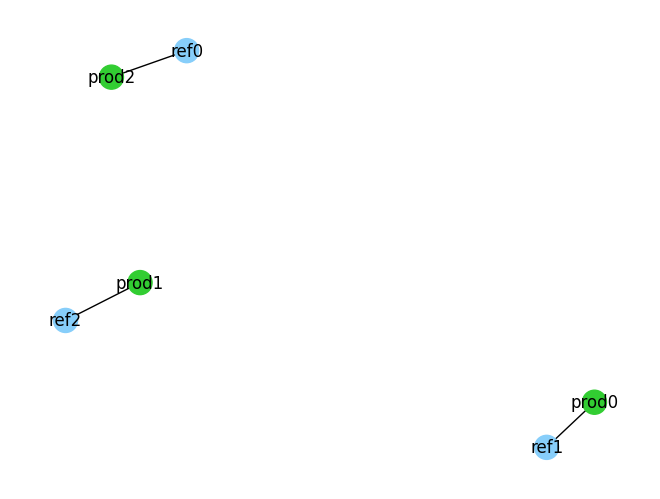

(id: 1) SURVIVED as (id: 1) (score: 0.9754693295547102)
(id: 2) SURVIVED as (id: 2) (score: 0.927520324870268)
(id: 0) SURVIVED as (id: 0) (score: 0.9349219524571691)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 392 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.793871192792304), np.float64(5.101683541605143), np.float64(7.958676846721273), np.float64(7.913890054339826), np.float64(2.6122955208224967), np.float64(0.723359756506918), np.float64(4.213845597657989), np.float64(2.0492169474335546), np.float64(5.120765148542487), np.float64(5.306239420242423), np.float64(3.9134695867451486), np.float64(6.889155302888042), np.float64(7.161582765867093), np.float64(6.226368384076331), np.float64(7.145634949076366), np.float64(4.820959205702341)]
prod0 - center: [np.float64(7.802308057372408), np.float64(5.959373106328704), np.float64(8.19

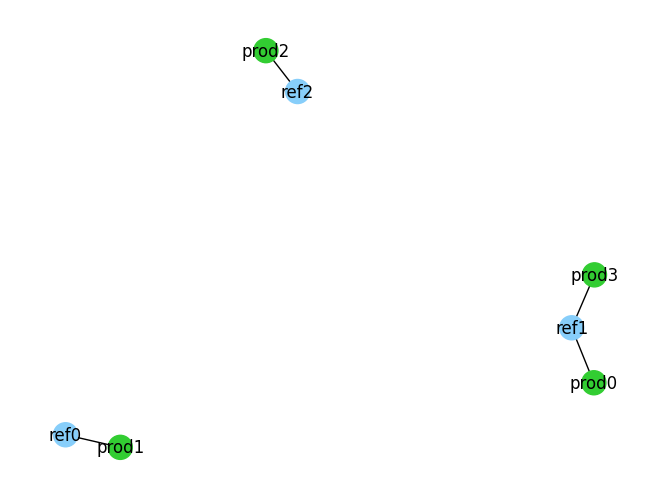

(id: 1) SURVIVED as (id: 1) (score: 0.5530375157164955)
(id: 0) SURVIVED as (id: 0) (score: 0.8503061976619508)
(id: 2) SURVIVED as (id: 2) (score: 0.9761274833203807)
(!) (id: 1) SURVIVED as (id: 3) but a SPLITTING is needed (score: 0.7913035206465022)

Final macroclusters:
(id: 0)
(id: 1)
(id: 2)
(id: 3)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 466 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.291575566777643), np.float64(4.949915836442192), np.float64(7.927145188709475), np.float64(8.002223824555019), np.float64(2.6353306050570504), np.float64(0.7277031777040014), np.float64(4.250853765685603), np.float64(1.8986178602812425), np.float64(5.139999034269801), np.float64(5.197150000986063), np.float64(3.952888070412402), np.float64(6.8690533727969765), np.float64(7.230598787091813), np.float64(6.218340104480959), np.float64(7.287560444957805), np.float64(4.7841646446371975

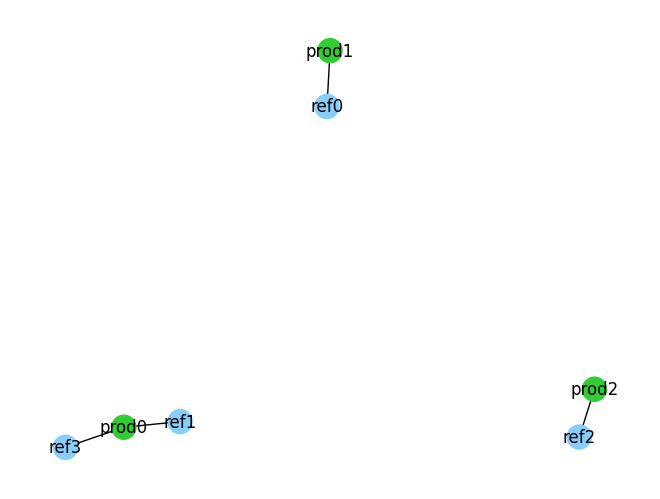

(!) [1, 3] are MERGED in (id: 4) (overlapping scores: [np.float64(0.6380680516070936), np.float64(0.6666906935829967)])
(id: 0) SURVIVED as (id: 0) (score: 0.9563172258521604)
(id: 2) SURVIVED as (id: 2) (score: 0.9790885825096041)

Final macroclusters:
(id: 0)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 605 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.410904477681775), np.float64(5.004873334559798), np.float64(7.932682974493522), np.float64(7.970314342229295), np.float64(2.6159326213557), np.float64(0.735602540807437), np.float64(4.221894373774642), np.float64(1.9357654714383012), np.float64(5.124356933849265), np.float64(5.2141372981828455), np.float64(3.9379646979969904), np.float64(6.881453619939339), np.float64(7.224551328676261), np.float64(6.232551098081521), np.float64(7.267946831610934), np.float64(4.798242673160993)]
prod0 - center: [np.float64(8.7

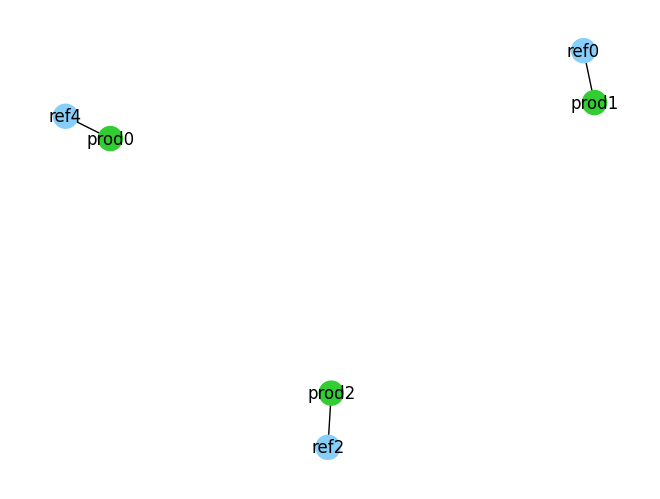

(id: 4) SURVIVED as (id: 4) (score: 0.936413376193547)
(id: 0) SURVIVED as (id: 0) (score: 0.9552305305997371)
(id: 2) SURVIVED as (id: 2) (score: 0.9799411011703031)

Final macroclusters:
(id: 0)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 748 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.518828830138952), np.float64(5.008969805739016), np.float64(7.952840857799499), np.float64(7.985639473975758), np.float64(2.648416612968589), np.float64(0.7264494550755543), np.float64(4.279374772646889), np.float64(1.9591965137065672), np.float64(5.144918113346524), np.float64(5.2455363109799515), np.float64(3.957233939400216), np.float64(6.868197448366028), np.float64(7.1818401860469585), np.float64(6.202235043537704), np.float64(7.192961743322325), np.float64(4.787786370587738)]
prod0 - center: [np.float64(9.059481736390373), np.float64(6.692701701548786), np.float64(8.5

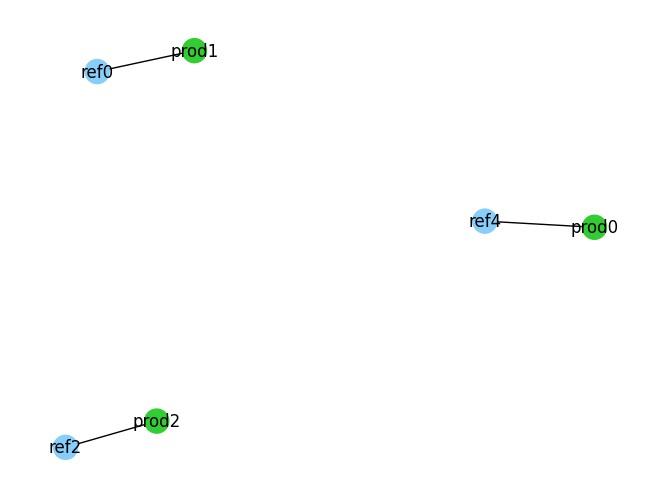

(id: 4) SURVIVED as (id: 4) (score: 0.899366901937909)
(id: 0) SURVIVED as (id: 0) (score: 0.9026965263174495)
(id: 2) SURVIVED as (id: 2) (score: 0.9889728166943269)

Final macroclusters:
(id: 0)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

<!> Change detected! Possible input drift at timestamp 878 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.232478476585226), np.float64(4.914733440318006), np.float64(7.92483761970033), np.float64(8.006857415463061), np.float64(2.632594884710109), np.float64(0.7259406552035758), np.float64(4.248265895437687), np.float64(1.884414018468654), np.float64(5.142848390213986), np.float64(5.1919962396012975), np.float64(3.956974836105996), np.float64(6.875315392271001), np.float64(7.243218158153778), np.float64(6.219780110298319), np.float64(7.312862558567778), np.float64(4.78605443873304)]
prod0 - center: [np.float64(5.310286932677826), np.float64(4.941548638156702), np.float64(7.92769

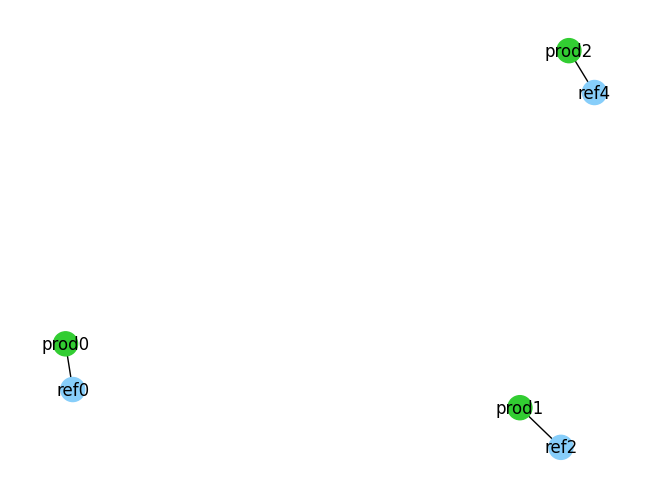

(id: 0) SURVIVED as (id: 0) (score: 0.9720516908448791)
(id: 2) SURVIVED as (id: 2) (score: 0.9813413983425224)
(id: 4) SURVIVED as (id: 4) (score: 0.9086075794371438)

Final macroclusters:
(id: 0)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------

Batch Finished ----> Apply macroclustering

ref0 - center: [np.float64(5.310286932677826), np.float64(4.941548638156702), np.float64(7.927692314930349), np.float64(7.996264498944035), np.float64(2.6281599997825906), np.float64(0.7174463236565428), np.float64(4.245142812207151), np.float64(1.9001064615434953), np.float64(5.140637858993928), np.float64(5.20023121030852), np.float64(3.949022824239445), np.float64(6.884853306075205), np.float64(7.2294813341047535), np.float64(6.218676769231873), np.float64(7.297010571707345), np.float64(4.789083548286522)]
prod0 - center: [np.float64(9.32878730032179), np.float64(6.6753971162345), np.float64(8.507200663585609), np.float64(7.607349907910383), np.

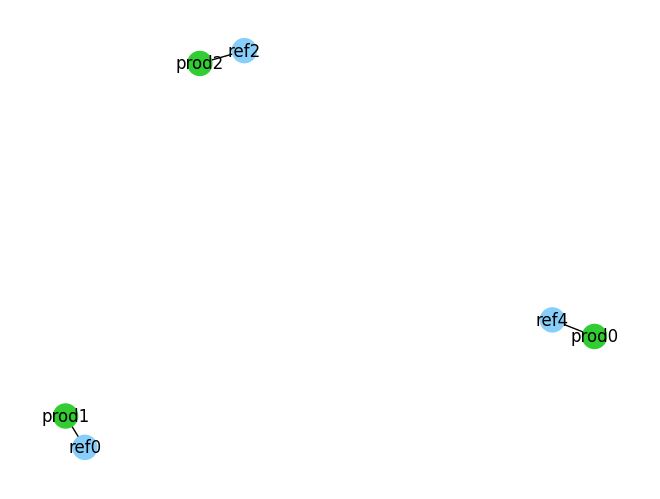

(id: 4) SURVIVED as (id: 4) (score: 0.9633665427611631)
(id: 0) SURVIVED as (id: 0) (score: 0.9730335558370283)
(id: 2) SURVIVED as (id: 2) (score: 1.0)

Final macroclusters:
(id: 0)
(id: 2)
(id: 4)

-----------------------------------------------------------------------------------



In [12]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(print_graph=True, print_statistics=True, macroclustering_at_end=True)

Creating the directory...
Drawing ...


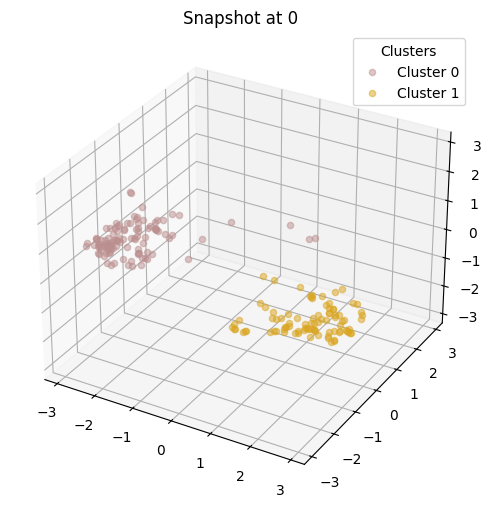

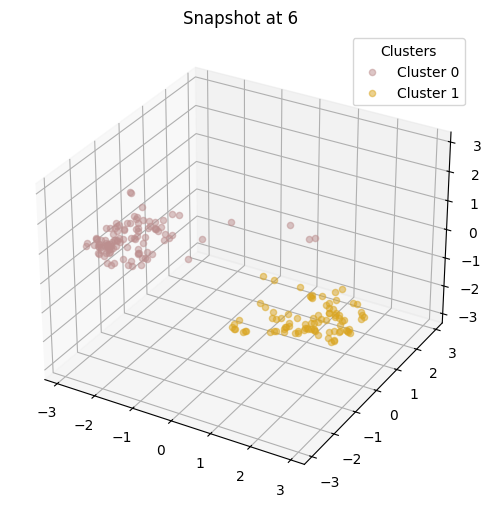

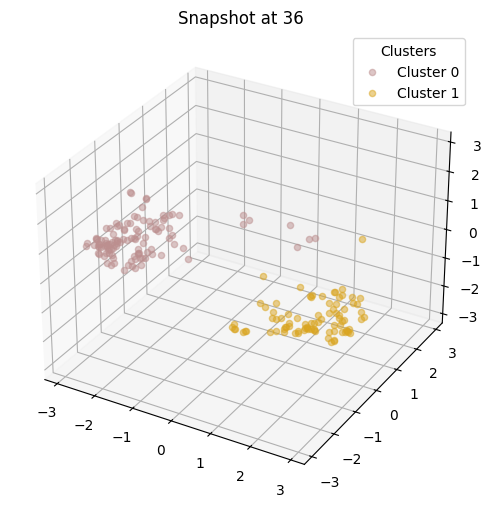

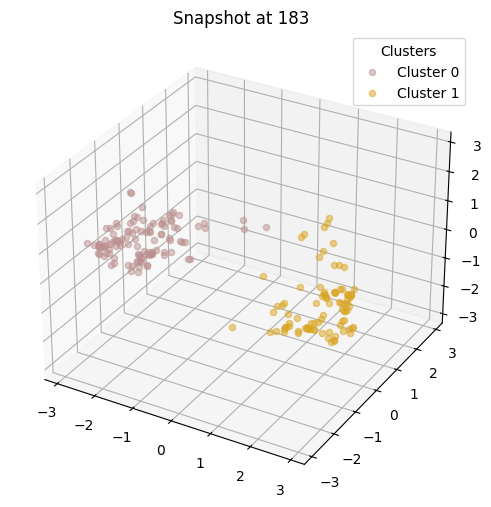

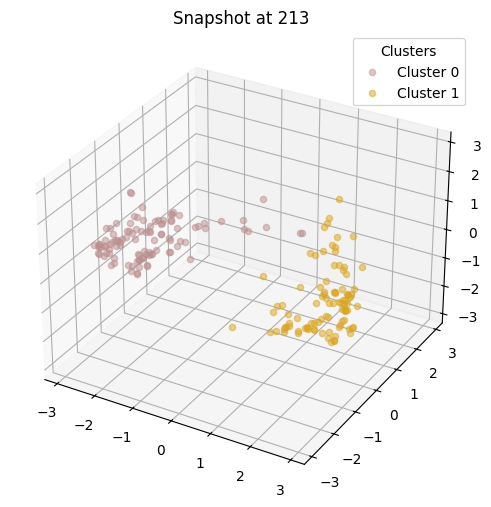

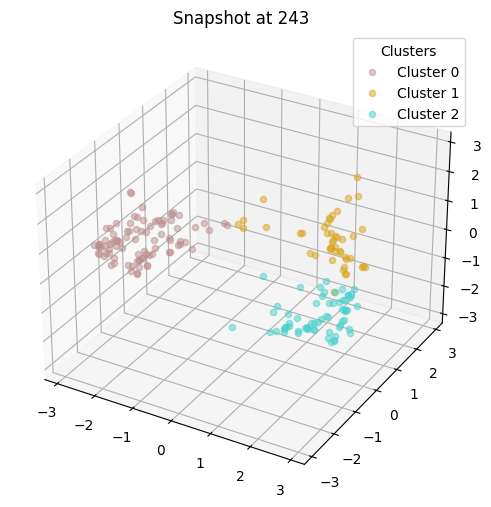

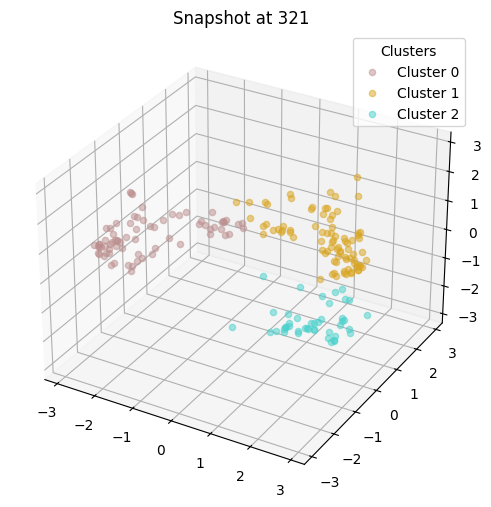

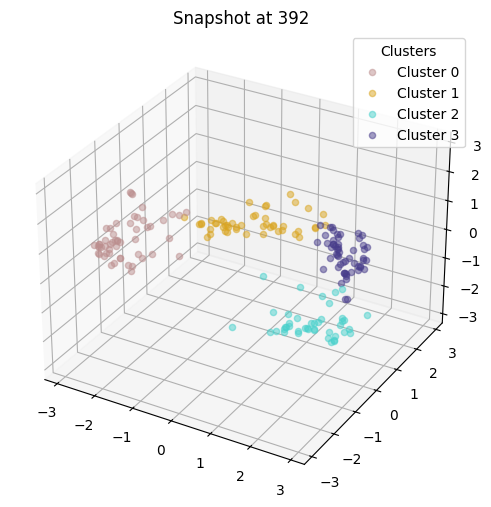

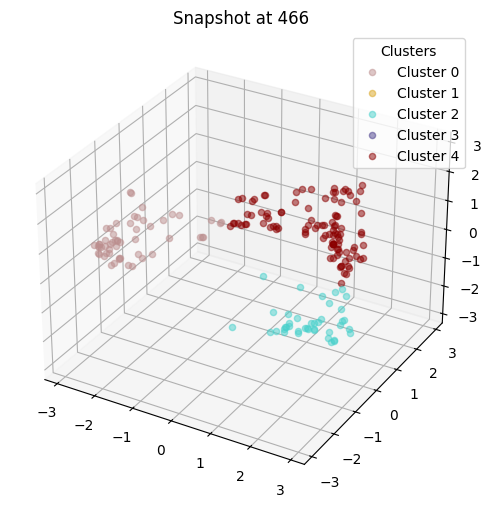

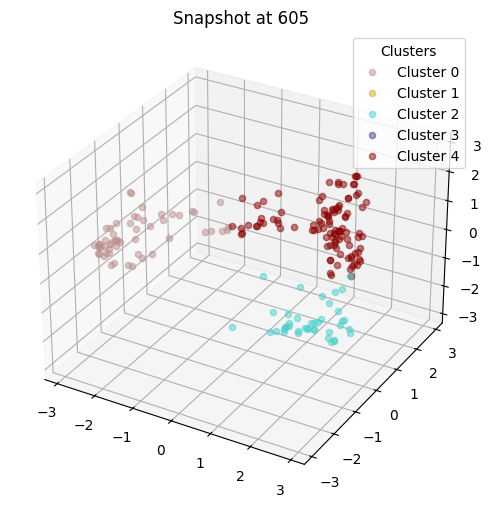

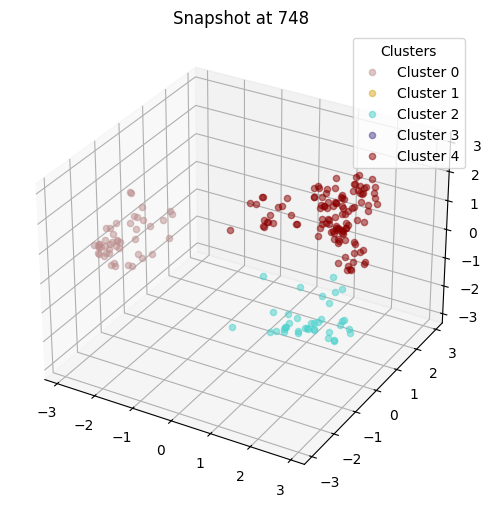

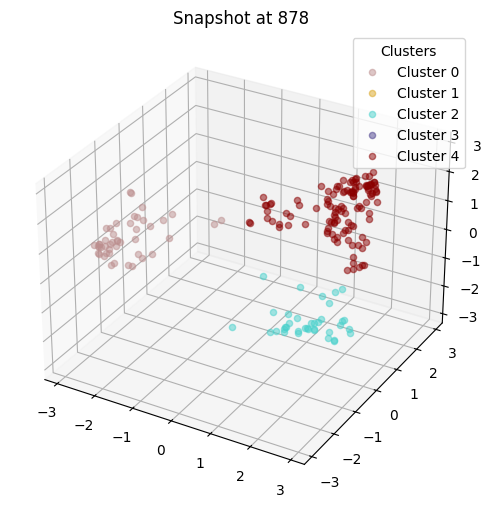

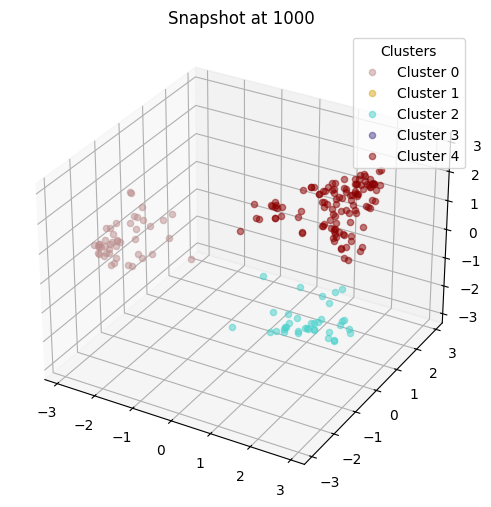

In [13]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=False)